In [3]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
def split_data(full_df, df, value):
    
    left  = (full_df[df <= value])
    right = (full_df[~(df <= value)])
    
    return left, right 

def probability(df):
    
    class_0 = (df == 0).sum()
    class_1 = (df == 1).sum()
   
    total = class_0 + class_1
    
    c0 = class_0 / total
    c1 = class_1 / total    
    
    return c0, c1


def entropy(p_0, p_1):
    if 0 in [p_0, p_1]:
        return 0
    else:
        return -(p_0 * np.log2(p_0) + p_1 * np.log2(p_1))


def entroty_start(df, df_1, df_2, start, left, right):
    return start - df_1.shape[0] / df.shape[0] * left - df_2.shape[0] / df.shape[0] * right



def main(full_df, df, target, ent_start):
    
    
    start = []

    for i in df:
        
        a, b = split_data(full_df, df, i)
    
        p0, p1 = probability(a[target])
        p_0, p_1 = probability(b[target])
    
        ent_0 = entropy(p0, p1)
        ent_1 = entropy(p_0, p_1)
    
        start_ent = entroty_start(df, a, b, ent, ent_0, ent_1)
        start.append(start_ent)


    return start

In [5]:
x = np.linspace(25, 10, 30)
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,25.000000,0
1,24.482759,0
2,23.965517,0
3,23.448276,0
4,22.931034,0


In [39]:
p_0, p_1 = probability(df['y'])

display(p_0, p_1)

0.43333333333333335

0.5666666666666667

In [40]:
ent = entropy(p_0, p_1)
ent

0.9871377743721863

In [46]:
res = main(df, df['x'], 'y', ent_start)

df['ent'] = res
df['ent'] = df['ent'].fillna(0)

df.head()

,x,y,ent
0,25.000000,0,0.000000
1,24.482759,0,0.041303
2,23.965517,0,0.084960
3,23.448276,0,0.131277
4,22.931034,0,0.180630


In [105]:
max_v = df[df['ent'] == df['ent'].max()]
max_values = max_v.values[0][0]

df[df['ent'] == df['ent'].max()]

,x,y,ent
8,20.862069,1,0.420105


In [69]:
df_test_1 = df[df['x'] <= max_values]

In [70]:
df_test_0 = df[~(df['x'] <= max_values)]

In [76]:
p0, p1 = probability(df_test_0['y'])

In [77]:
P0, P1 = probability(df_test_1['y'])

In [78]:
ent_0 = entropy(p0, p1)
ent_1 = entropy(P0, P1)

In [79]:
entroty_start(df, df_test_0, df_test_1, ent, ent_0, ent_1)

0.42010487989458767

In [108]:
df_test_0

,x,y,ent
0,25.000000,0,0.000000
1,24.482759,0,0.041303
2,23.965517,0,0.084960
3,23.448276,0,0.131277
4,22.931034,0,0.180630
5,22.413793,0,0.233487
6,21.896552,0,0.290446
7,21.379310,0,0.352295


In [112]:
df_test_1

,x,y,ent
8,20.862069,1,0.420105
9,20.344828,0,0.281859
10,19.827586,1,0.349521
11,19.310345,1,0.266082
12,18.793103,0,0.204104
13,18.275862,0,0.268452
14,17.758621,1,0.347426
15,17.241379,1,0.285563
16,16.724138,1,0.233137
17,16.206897,0,0.187961


In [153]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [130]:
full_df = pd.read_csv('cardio_train.csv', sep=';')
full_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [147]:
df = full_df.iloc[::, [1, 5, -1]]
df['age'] = round(df['age'] / 365)
df = df.head(10)

feature = ['age', 'ap_hi']
target = ['cardio']

df.head()

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


In [143]:
X = full_df.iloc[:10][feature]
y = full_df.iloc[:10][target]

In [144]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [150]:
y_pred = model.predict(X)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [151]:
print(metrics.accuracy_score(y, y_pred))

1.0


[Text(0.3333333333333333, 0.875, 'ap_hi <= 125.0\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.625, 'age <= 21170.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.375, 'age <= 22348.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

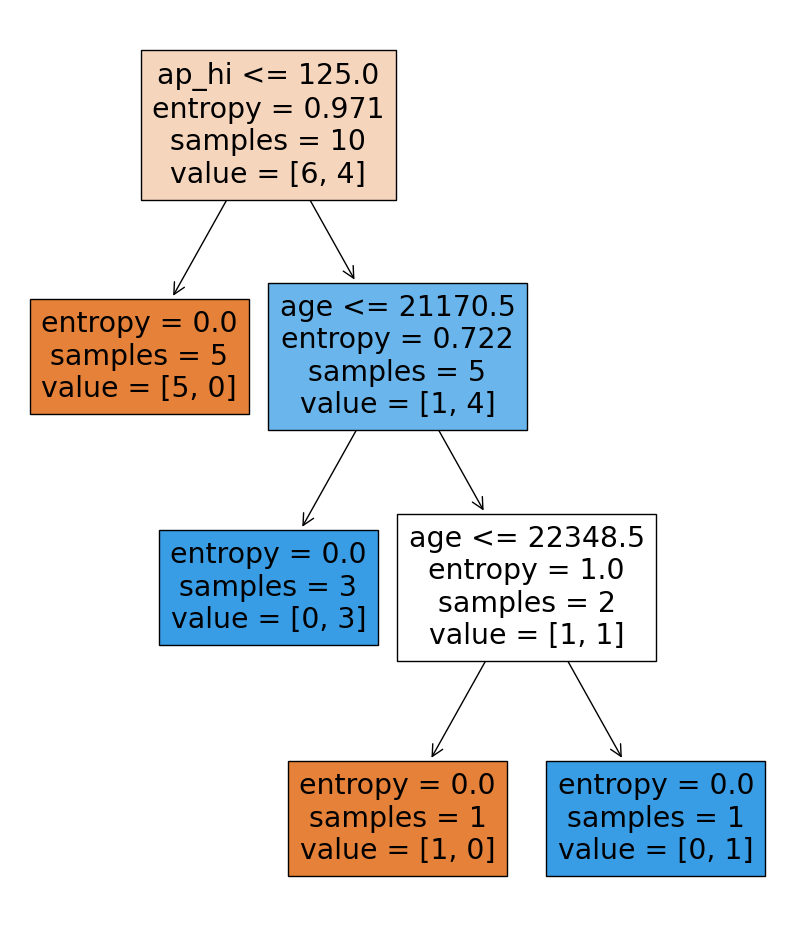

In [154]:
plt.figure(figsize=(10, 12))
plot_tree(model, feature_names=feature, filled=True)

In [155]:
model.feature_importances_

array([0.37176356, 0.62823644])

-----

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics, datasets
from sklearn.datasets import make_regression

In [30]:
x, y = make_regression(n_samples=50, n_features=2, n_informative=2, n_targets=1, noise=0.35)

df = pd.DataFrame(x, columns=['x0', 'x1'])
df['y'] = y

df.head()

,x0,x1,y
0,0.255188,1.307225,116.160933
1,0.047535,0.427379,35.843164
2,-0.696885,0.429102,-12.220197
3,0.475687,-0.738561,-25.165338
4,-0.643978,-1.073427,-122.912878


In [89]:
model_tree_reg = DecisionTreeRegressor(random_state=42, max_depth=4)
model_tree_reg.fit(x, y)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [90]:
y_predict = model_tree_reg.predict(x)

y_predict

array([ 136.65775426,   39.12023852,  -14.81111872,   13.81542814,
       -117.20556603,  -14.81111872,   13.81542814, -117.20556603,
        -56.70950069,  -99.07108413,  -46.13374826,  -20.07719408,
        -20.07719408,   13.81542814,  196.69932589,  -20.07719408,
        131.08170554,   13.81542814,   19.78494199,   13.81542814,
         13.81542814,   39.12023852,   13.81542814, -172.96655529,
        -99.07108413,  196.69932589,  136.65775426,  -20.07719408,
        104.1080054 ,   10.34401328, -175.0343059 ,  136.65775426,
        104.1080054 ,   13.81542814,  -14.81111872,   13.81542814,
         13.81542814,  -20.07719408,  -20.07719408,   10.34401328,
        -56.70950069,   10.34401328,  136.65775426, -117.20556603,
         13.81542814,  -14.81111872,  -46.13374826, -117.20556603,
        -56.70950069,  -14.81111872])

In [91]:
print(np.mean(np.abs(y - y_predict)))

11.235055899860367


In [92]:
print(model_tree_reg.score(x, y))

0.9688492151137486


In [93]:
print(model_tree_reg.score(x, y_predict))

1.0


In [94]:
model_tree_reg.feature_importances_

array([0.38590882, 0.61409118])

[Text(0.5, 0.9, 'x1 <= 0.293\nsquared_error = 7208.786\nsamples = 50\nvalue = 1.769'),
 Text(0.25, 0.7, 'x1 <= -0.906\nsquared_error = 3638.851\nsamples = 30\nvalue = -41.528'),
 Text(0.125, 0.5, 'x1 <= -1.745\nsquared_error = 2191.396\nsamples = 8\nvalue = -113.636'),
 Text(0.0625, 0.3, 'x0 <= 0.225\nsquared_error = 1.069\nsamples = 2\nvalue = -174.0'),
 Text(0.03125, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = -175.034'),
 Text(0.09375, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = -172.967'),
 Text(0.1875, 0.3, 'x0 <= 0.289\nsquared_error = 1302.028\nsamples = 6\nvalue = -93.515'),
 Text(0.15625, 0.1, 'squared_error = 133.279\nsamples = 4\nvalue = -117.206'),
 Text(0.21875, 0.1, 'squared_error = 272.056\nsamples = 2\nvalue = -46.134'),
 Text(0.375, 0.5, 'x0 <= -0.729\nsquared_error = 1586.914\nsamples = 22\nvalue = -15.307'),
 Text(0.3125, 0.3, 'x0 <= -1.173\nsquared_error = 503.657\nsamples = 5\nvalue = -73.654'),
 Text(0.28125, 0.1, 'squared_error = 154.512\nsamples = 2\nval

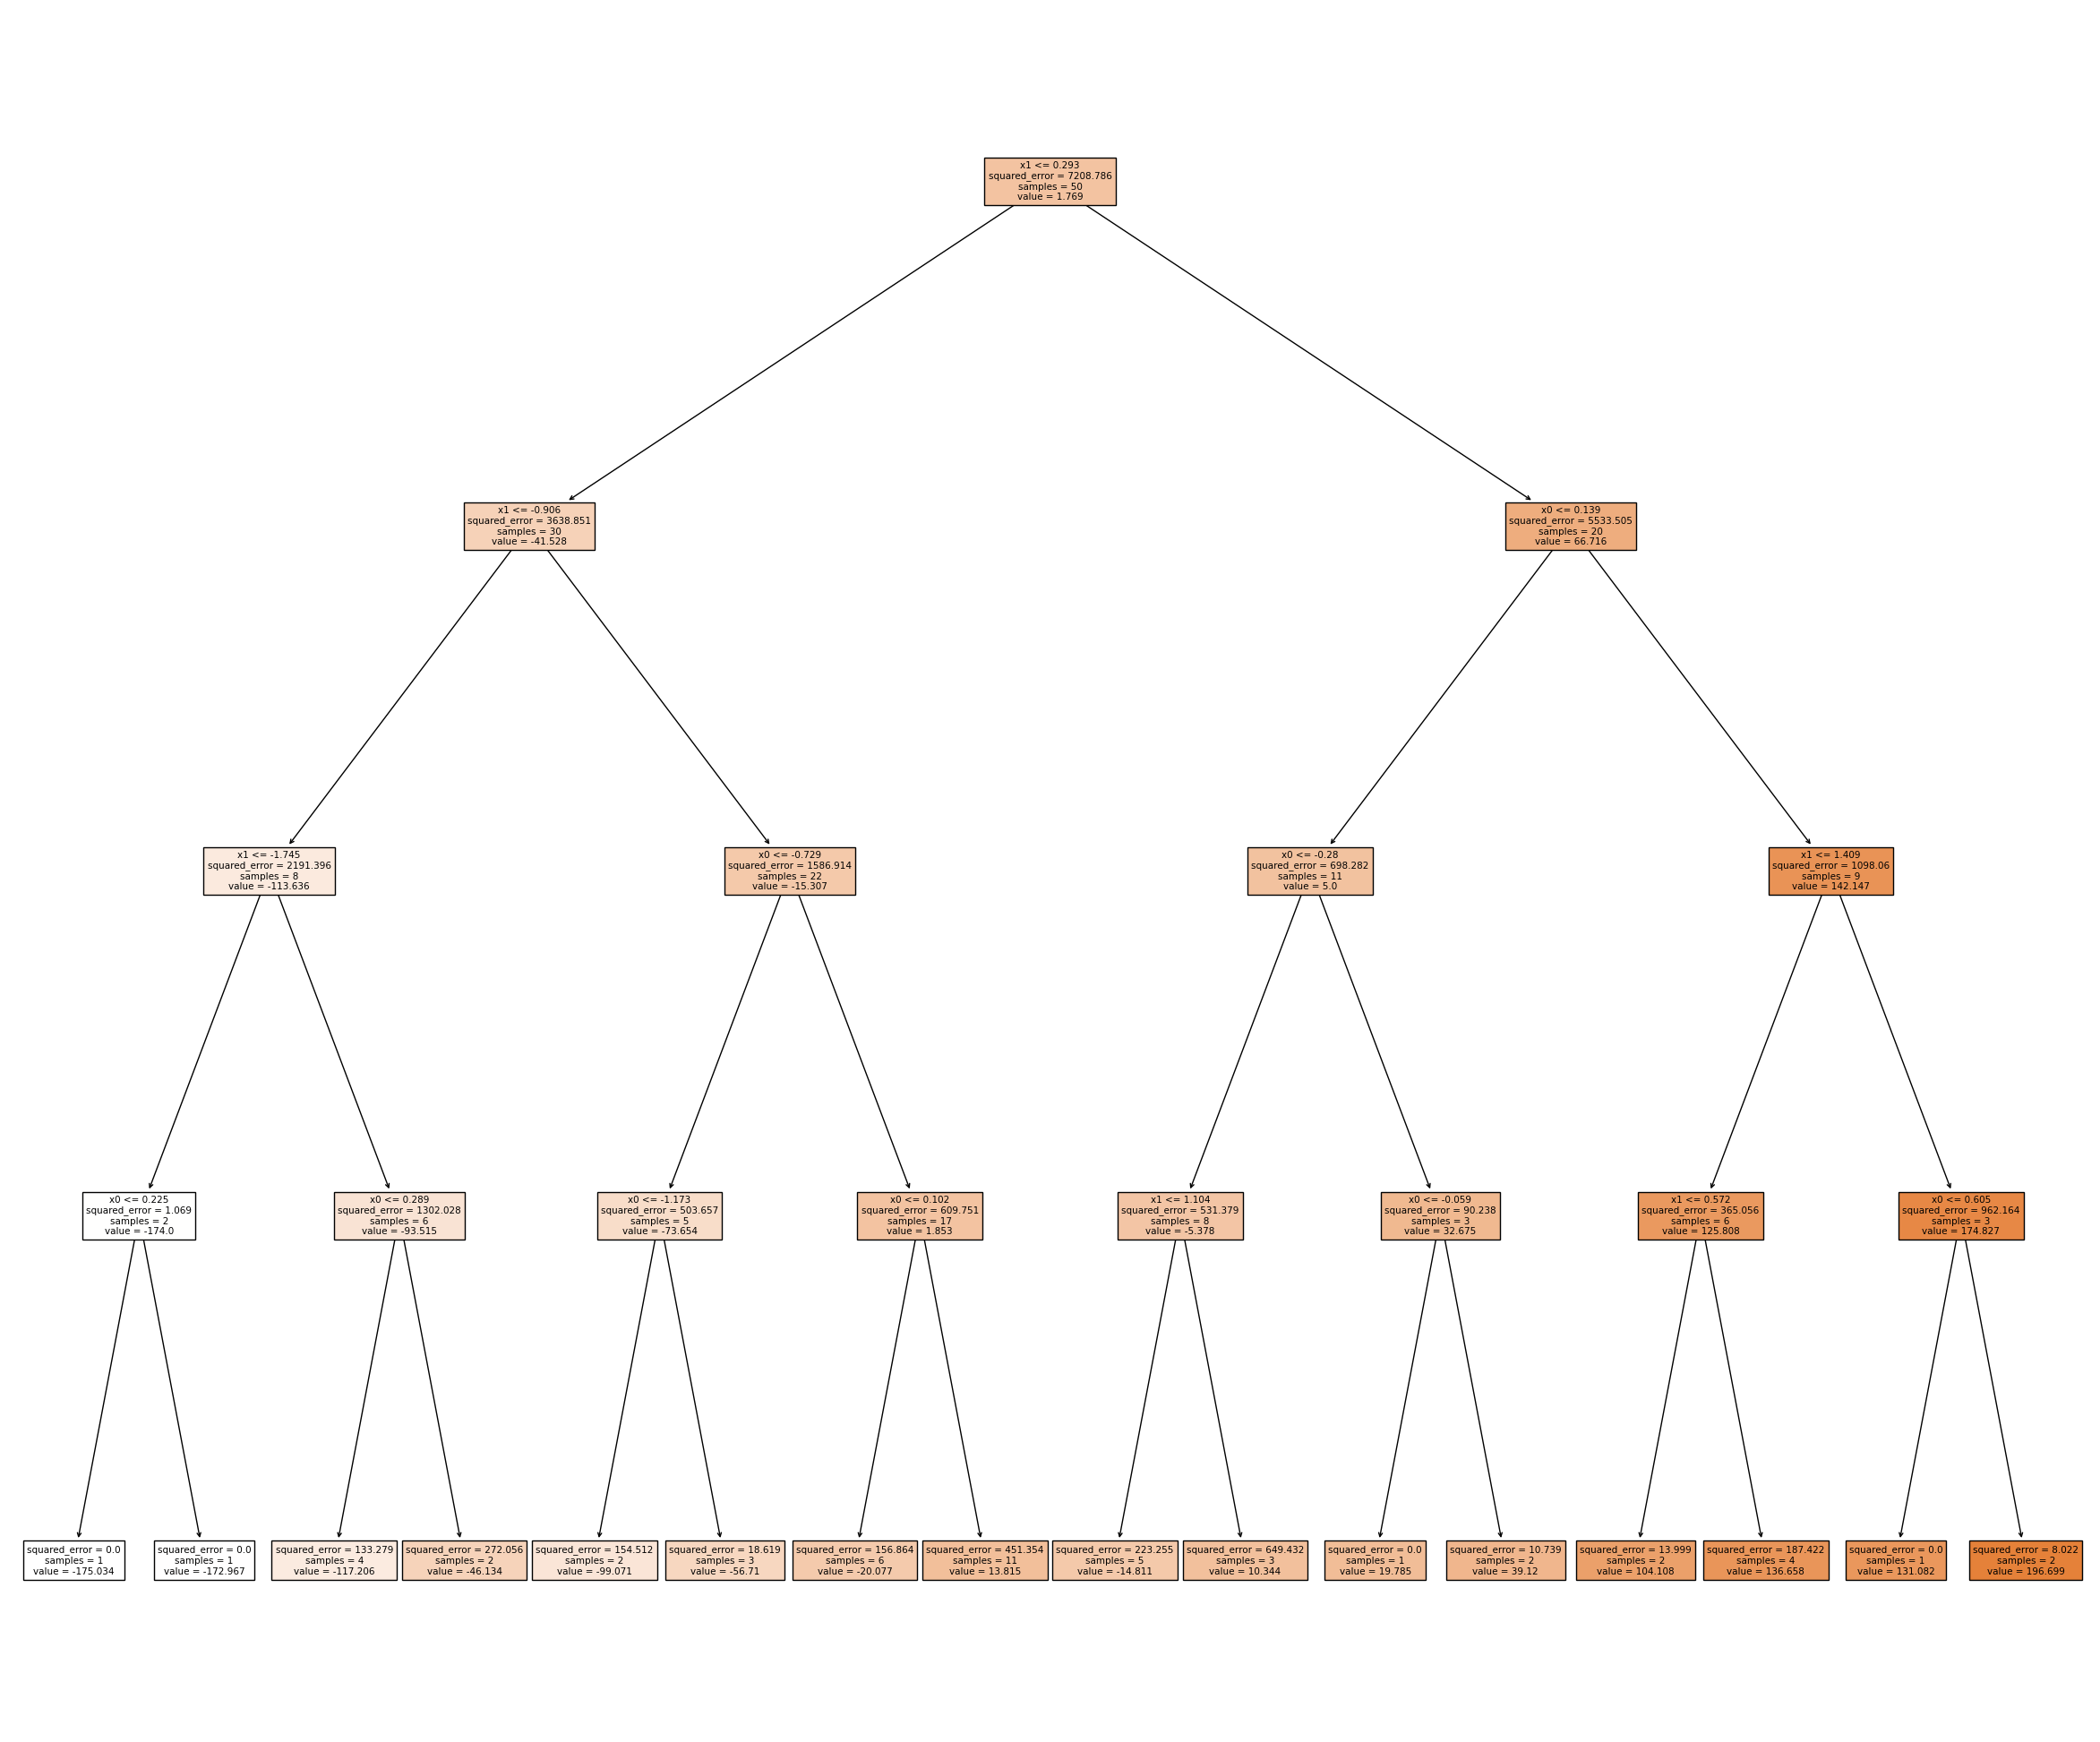

In [95]:
plt.figure(figsize=(30, 25))
plot_tree(model_tree_reg, feature_names=list(df.iloc[::, [0, 1]]), filled=True)

In [97]:
print(model_tree_reg.predict([[0.255188, 1.307225]]))

[136.65775426]


In [107]:
sort = model_tree_reg.feature_importances_.argsort()

<BarContainer object of 2 artists>

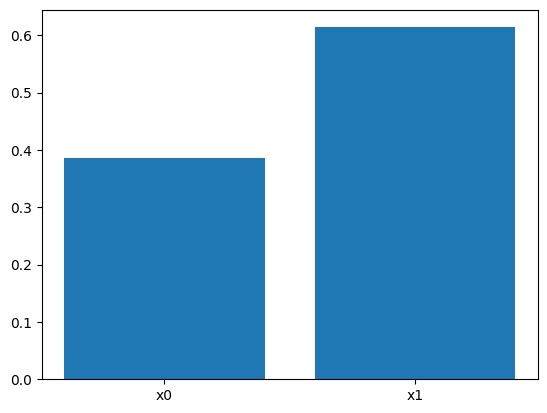

In [108]:
plt.bar(list(df.iloc[::, sort]), model_tree_reg.feature_importances_)